In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day37-handling-missing-categorical-data/train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

# Mode

use when : MCAR, Mode is significatly more repeated than others

disadv : changed corr, cov

In [3]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

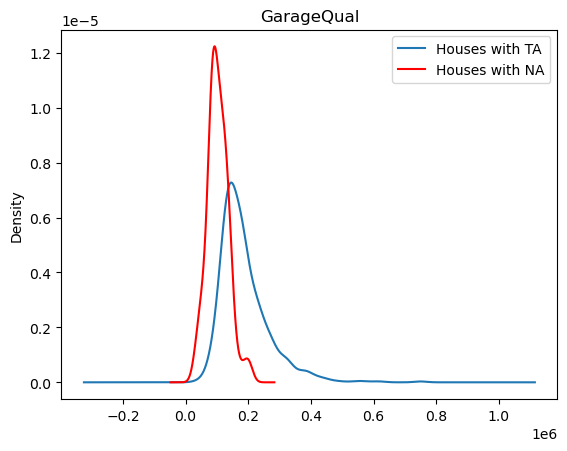

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [5]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [6]:
df['GarageQual'].fillna('TA', inplace=True)

C:\Users\91755\AppData\Local\Temp\ipykernel_15064\1818999247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

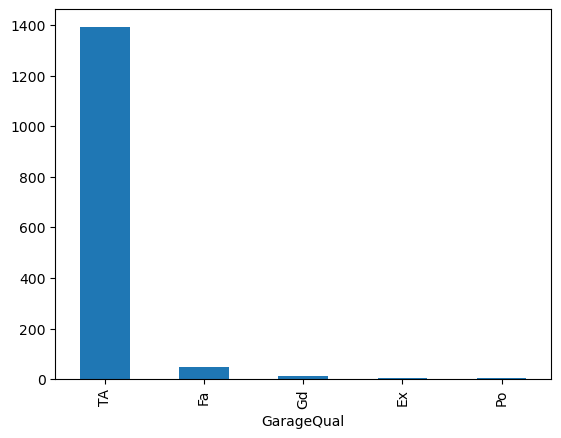

In [7]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

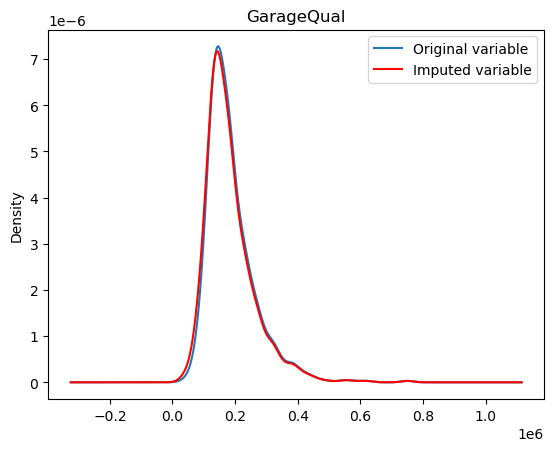

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

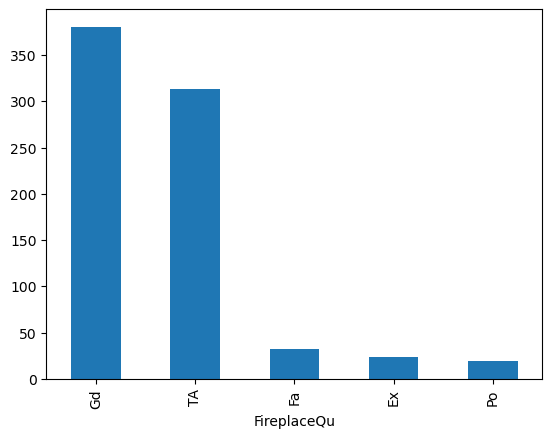

In [9]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [10]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

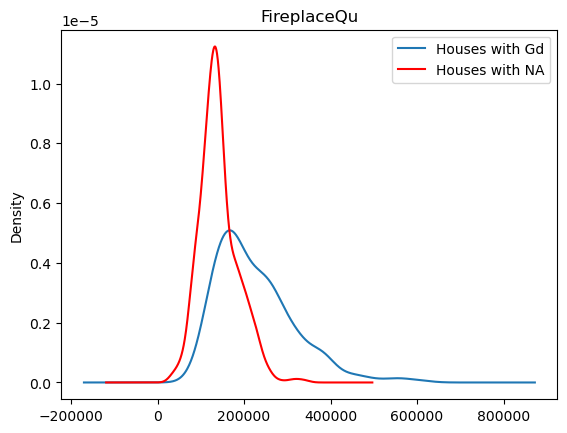

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [12]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']


In [13]:
df['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\91755\AppData\Local\Temp\ipykernel_15064\3912738894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

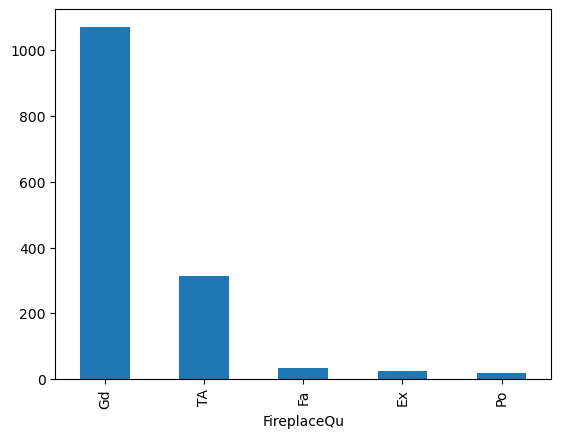

In [14]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

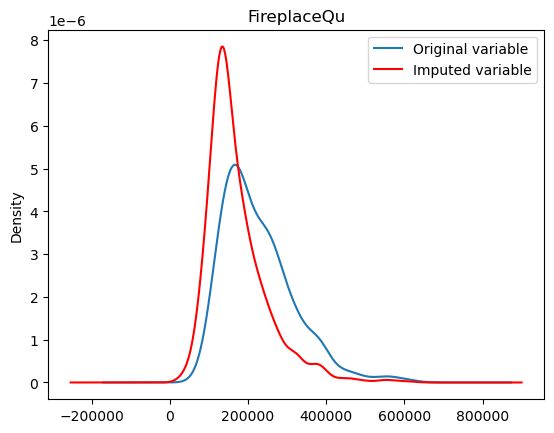

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Gd', 'TA'], dtype=object)

# Missing Category Imputation

when more than 10% data is missing we create new category called missing to represent those missing parts

In [18]:
df.isnull().mean()*100

FireplaceQu    0.0
GarageQual     0.0
SalePrice      0.0
dtype: float64

Text(0, 0.5, 'Number of houses')

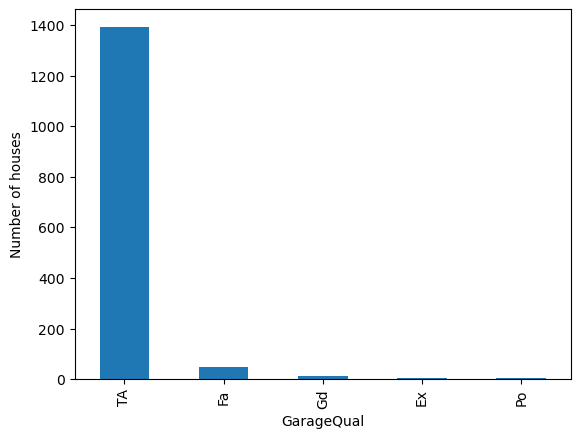

In [19]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [20]:
df['GarageQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

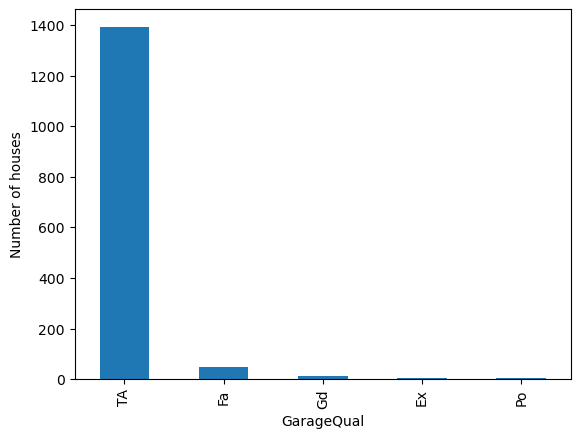

In [21]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [24]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

# Random Imputation

- Use random numbers selected from numbers present in col
- applicable for both num and cat
- doesnt work good on tree based algos
- benefit : easy using pandas, distribution doesnt change
- disadv : disturbs cov, memory heavy for deployment as it need to look at the complete training data to decide the fill in value thats why that training data will also be needed to be stored on server


### For Num:

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [ ]:
# Impute missing values for Age

X_train['Age_imputed'][X_train['Age'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum(), replace=True).values
X_test['Age_imputed'][X_test['Age'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum(), replace=True).values

# we dropped the nulls first then took out the samples and placed then at the null places

C:\Users\91755\AppData\Local\Temp\ipykernel_15064\2538952970.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum(), replace=True).va

C:\Users\91755\AppData\Local\Temp\ipykernel_15064\4177349687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist = False)
C:\Users\91755\AppData\Local\Temp\ipykernel_15064\4177349687.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_tr

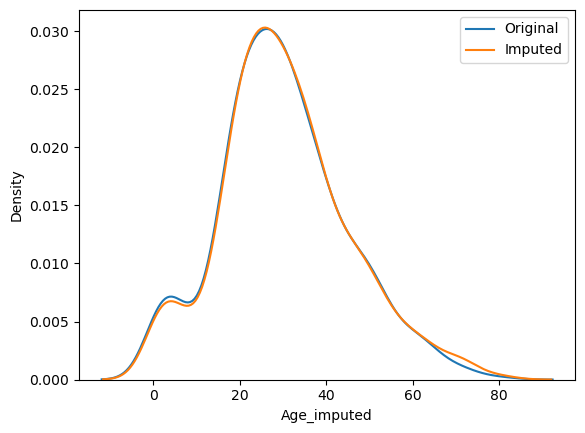

In [41]:
import seaborn as sns

sns.distplot(X_train['Age'], label='Original', hist = False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist = False)

plt.legend()

In [44]:
print('OG var', X_train['Age'].var())
print('Imp var', X_train['Age_imputed'].var())

OG var 212.15575471006937
Imp var 221.38807934208103


In [45]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2374.871620,72.561927,46.787739
Age,72.561927,212.155755,212.155755
Age_imputed,46.787739,212.155755,221.388079


relation changed

<Axes: >

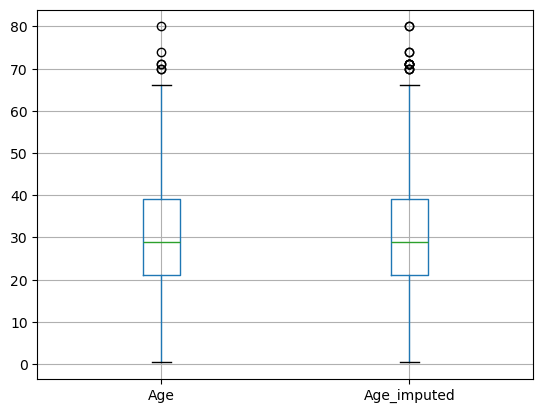

In [47]:
X_train[['Age', 'Age_imputed']].boxplot()

Each time a random value is picked like suppose for 60 -> 40 is picked. but next time when user inputs 60 -> 20 picked.

thats wrong. hence to fix the randomness we use random_state linked to FARE.

sampling stays consistent

In [53]:
observation = X.sample(1).iloc[0]  # Get one random row as a Series
sampled_value = X['Age'].dropna().sample(1, random_state=int(observation['Fare']))

### For Cat:

In [54]:
data = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day37-handling-missing-categorical-data/train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [55]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [57]:
X = data  # coz we need target for graph
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [59]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [61]:
# Impute missing values 

X_train['GarageQual_imputed'][X_train['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum(), replace=True).values
X_test['GarageQual_imputed'][X_test['GarageQual'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum(), replace=True).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum(), replace=True).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum(), replace=True).values

# we dropped the nulls first then took out the samples and placed then at the null places

C:\Users\91755\AppData\Local\Temp\ipykernel_15064\1753011317.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnu

In [63]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train['GarageQual_imputed'].dropna())
    ],
    axis=1
)

temp.columns = ['Original', 'Imputed']

In [64]:
temp

,Original,Imputed
TA,0.951043,0.950342
Fa,0.037171,0.035959
Gd,0.009973,0.011986
Po,0.000907,0.000856
Ex,0.000907,0.000856


minor difference hence can be used

In [65]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(X_train['FireplaceQu_imputed'].dropna())
    ],
    axis=1
)

temp.columns = ['Original', 'Imputed']

In [66]:
temp

,Original,Imputed
Gd,0.494272,0.497432
TA,0.412439,0.406678
Fa,0.040917,0.041096
Po,0.027823,0.030822
Ex,0.024550,0.023973


C:\Users\91755\AppData\Local\Temp\ipykernel_15064\2991885412.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category, hist=False)
C:\Users\91755\AppData\Local\Temp\ipykernel_15064\2991885412.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

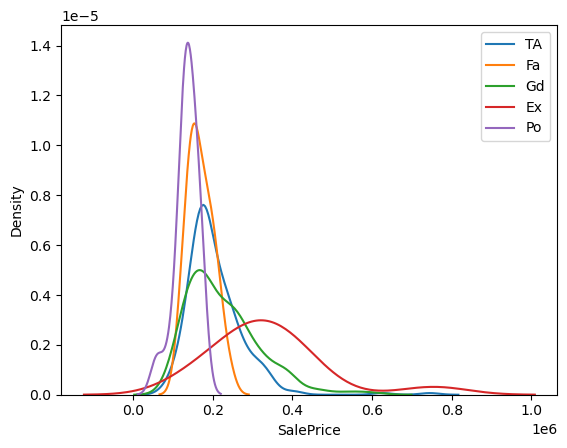

In [69]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category, hist=False)
plt.legend()

C:\Users\91755\AppData\Local\Temp\ipykernel_15064\2683781568.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], label=category, hist=False)
C:\Users\91755\AppData\Local\Temp\ipykernel_15064\2683781568.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

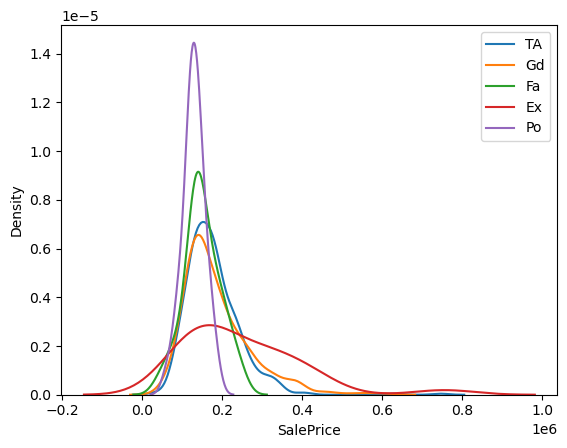

In [70]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], label=category, hist=False)
plt.legend()

should not apply coz more data missing and distribution shifts